In [1]:
%matplotlib widget
%matplotlib inline


[*********************100%%**********************]  1 of 1 completed


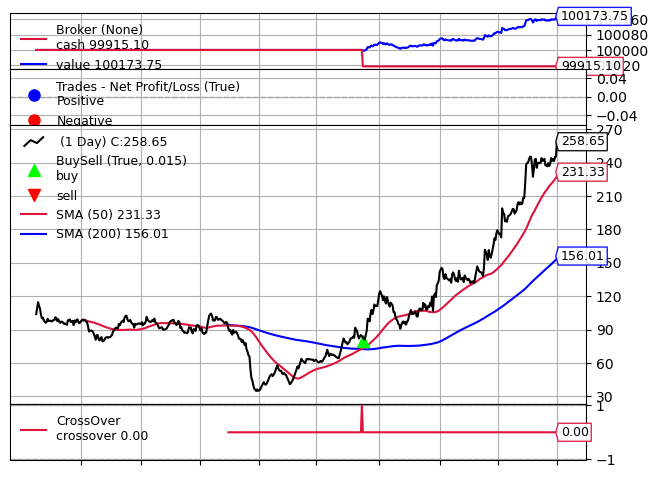

Starting Portfolio Value: 100173.75
Final Portfolio Value: 100173.75


In [2]:
from datetime import datetime
import backtrader as bt
from backtrader import plot
import yfinance as yf
# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=50,  # period for the fast moving average
        pslow=200   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance
cerebro.broker.setcash(100000)
# Create a data feed
data = bt.feeds.PandasData(dataname=yf.download('KPITTECH.NS', '2019-01-01', '2021-07-06'))

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all

%matplotlib widget
%matplotlib inline
cerebro.plot(iplot=False, volume=False, savefig=True, figfilename='backtrader-plot.png')  # and plot it with a single command

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())




In [14]:
import backtrader 
import datetime 
#from Strategy import TestStrategy


cerebro = backtrader.Cerebro()
cerebro.broker.set_cash(1000000)

data = backtrader.feeds.YahooFinanceCSVData(
    dataname='Resources/BTC-USD.csv',
    # Do not pass values before this date
    fromdate = datetime.datetime(2018,5,5),
    # Do not pass values after this date 
    todate = datetime.datetime(2023,5,5),
    reverse = False)
cerebro.adddata(data)



#cerebro.addstartegy(TestStrategy)
print('Starting portfolio Value %.2f' % cerebro.broker.getvalue())

cerebro.run()

print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

NameError: name 'null' is not defined